<a href="https://colab.research.google.com/github/kussy29/machine_learning/blob/main/lab04_penalized_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Analyzing and Plotting Bias in Penalized Regression**

-------------------------------

In this assignment, you will explore how **Ridge** and **Lasso** regression introduce **bias** into a model to reduce **variance**, and how the choice of the regularization parameter $\lambda$ affects this trade-off. The goal is to visualize and analyze the **bias-variance trade-off** and understand the conditions under which penalization helps or hinders model performance.

## **The Question**

**How does varying the regularization parameter $\lambda$ in Ridge and Lasso regression impact the trade-off between bias and variance?**

- Generate a synthetic dataset based on a **known** linear relationship:
  
  $$
  y = \beta_0 + \beta_1 x + \ldots + \epsilon
  $$

  where $$\epsilon \sim \mathcal{N}(0, \sigma^2),$$

  use a **high-dimensional** setting (e.g., 50 predictors) with only a few non-zero true coefficients to emphasize the effects of regularization. I stress, the $\beta_i$ coefficients should be known for this experiment and they should be mostly 0, with only a few non-zero parameters.

- Investigate how increasing $\lambda$ influences the model’s **bias**, **variance**, and **Mean Squared Error (MSE)**.
- Plot **Bias²**, **Variance**, and **MSE** on a single graph for both Ridge and Lasso models.
- Explain MSE decomposition into bias and variance. Read more on the MSE decomposition if you need to.

**Does the regularization lead to an optimal trade-off point where MSE is minimized? Explain why this point exists.**




**Expected Outcome:**
 - As $\lambda$ increases:
   - **Bias** increases (the model becomes too simple).
   - **Variance** decreases (the model becomes more stable).
   - **MSE** forms a **U-shape**, revealing the optimal trade-off.

- Analyze how **Ridge** and **Lasso** differ in terms of their bias-variance trade-offs.
- Discuss situations where one method may outperform the other, considering factors like **feature sparsity** and **multicollinearity**.


## **Colab Notebook Requirements**
- Your **Colab notebook** should:
  - Simulate the synthetic dataset and apply Ridge and Lasso regression.
  - Plot **Bias²**, **Variance**, and **MSE** against $\lambda$ for both models.
  - Include a section answering the questions.
  - Be well-documented with comments and explanations for each step.


## **Publish on GitHub**
- Upload your Colab notebook to your **GitHub repository** for this course.
- In your repository’s **README**, include a **link** to the notebook.
- In the notebook include **“Open in Colab”** badge so the notebook can be launched directly from GitHub.


In [18]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(200)
#Creating data 100 x 1100
X=np.random.uniform(high=1,size=(1000,100))

betas=np.random.normal(scale=2,size=100)+1
mask=np.random.choice([True,False],size=100,p=[0.8,0.2])
betas[mask]=0

y=np.dot(X,betas)+np.random.normal(scale=1,size=1000)




print(f'Number of 0s in betas {list(mask).count(True)} out of {len(mask)}')


Number of 0s in betas 83 out of 100


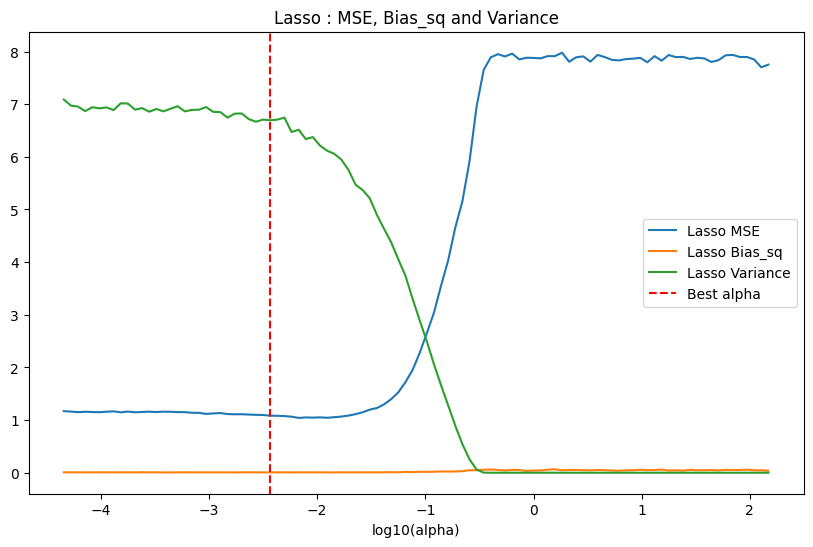

Text(0.5, 0, 'log10(alpha)')

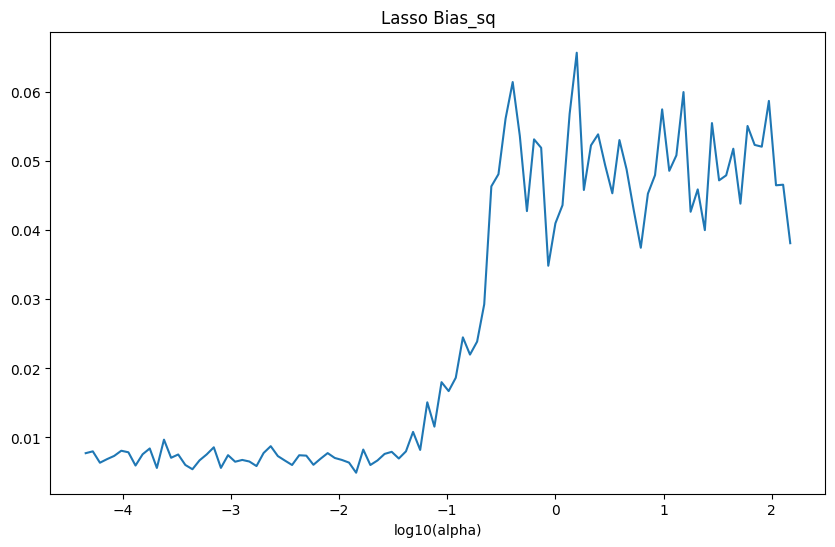

In [19]:
alphas=np.exp(np.linspace(-10,5,100))

ridge_mses=[]
lasso_mses=[]
ridge_biases=[]
ridge_variances=[]
lasso_biases=[]
lasso_variances=[]
min_mse_lasso=float('inf')
min_mse_ridge=float('inf')
alpha_lasso=0
alpha_ridge=0
for alpha in alphas:

    ridge_mse=[]
    lasso_mse=[]
    ridge_bias=[]
    ridge_variance=[]
    lasso_bias=[]
    lasso_variance=[]
    for i in range(100):
      X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)
      ridge=Ridge(alpha=alpha).fit(X_train,y_train)
      lasso=Lasso(alpha=alpha).fit(X_train,y_train)

      # Calculating MSE, Bias and Variance
      y_pred_ridge=ridge.predict(X_test)
      y_pred_lasso=lasso.predict(X_test)

      ridge_mse.append(np.mean((y_test-y_pred_ridge)**2))
      lasso_mse.append(np.mean((y_test-y_pred_lasso)**2))

      if np.mean((y_test-y_pred_ridge)**2)<min_mse_ridge:
          min_mse_ridge=np.mean((y_test-y_pred_ridge)**2)
          alpha_ridge=alpha

      if np.mean((y_test-y_pred_lasso)**2)<min_mse_lasso:
          min_mse_lasso=np.mean((y_test-y_pred_lasso)**2)
          alpha_lasso=alpha


      ridge_bias.append(np.mean(y_test-y_pred_ridge)**2)
      lasso_bias.append(np.mean(y_test-y_pred_lasso)**2)

      ridge_variance.append(np.var(y_pred_ridge))
      lasso_variance.append(np.var(y_pred_lasso))

    ridge_mses.append(np.mean(ridge_mse))
    lasso_mses.append(np.mean(lasso_mse))
    ridge_biases.append(np.mean(ridge_bias))
    ridge_variances.append(np.mean(ridge_variance))
    lasso_biases.append(np.mean(lasso_bias))
    lasso_variances.append(np.mean(lasso_variance))

log_alphas=np.log10(alphas)
ridge_biases_2=np.array(ridge_biases)
lasso_biases_2=np.array(lasso_biases)

plt.figure(figsize=(10,6))

plt.plot(log_alphas,lasso_mses,label='Lasso MSE')
plt.plot(log_alphas,lasso_biases_2,label='Lasso Bias_sq')
plt.plot(log_alphas,lasso_variances,label='Lasso Variance')
plt.axvline(x=np.log10(alpha_lasso), color='red', linestyle='--', label=f"Best alpha")
plt.title("Lasso : MSE, Bias_sq and Variance")
plt.xlabel("log10(alpha)")
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(log_alphas,lasso_biases_2,label='Lasso Bias_sq')
plt.title("Lasso Bias_sq")
plt.xlabel("log10(alpha)")







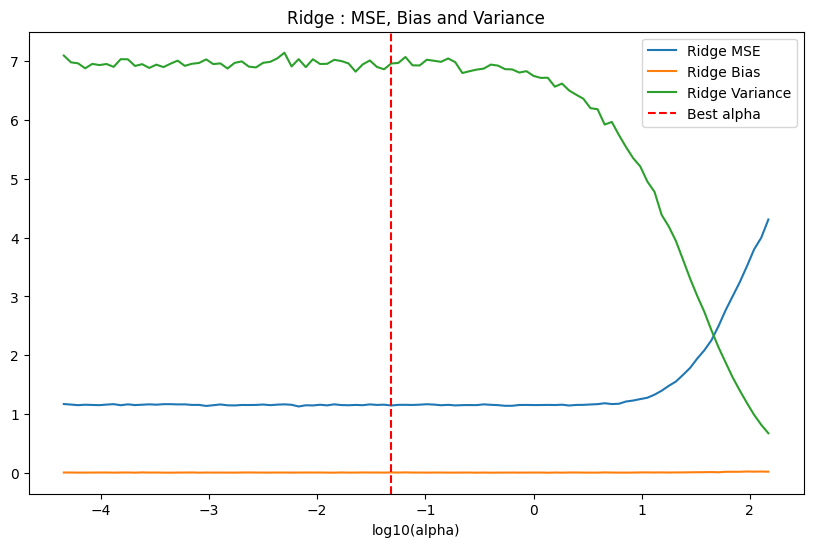

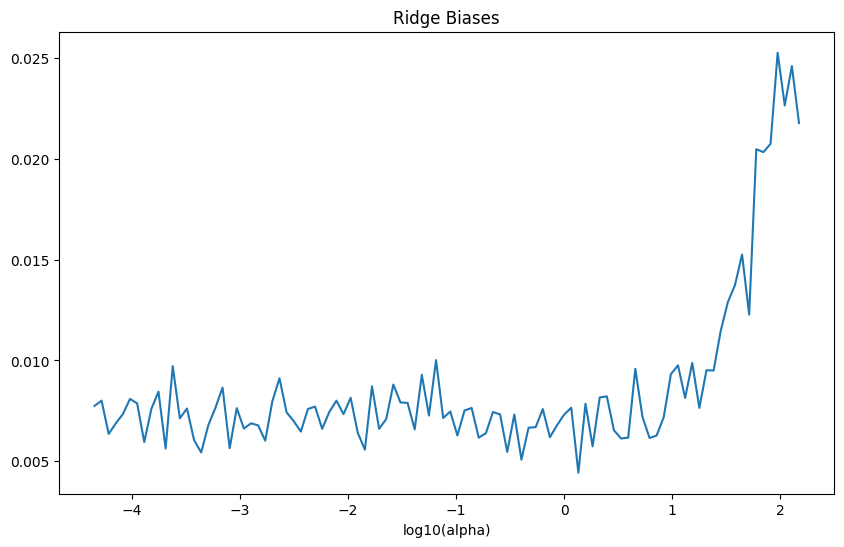

In [20]:
plt.figure(figsize=(10,6))
plt.plot(log_alphas,ridge_mses,label='Ridge MSE')
plt.plot(log_alphas,ridge_biases_2,label='Ridge Bias')
plt.plot(log_alphas,ridge_variances,label='Ridge Variance')
plt.axvline(x=np.log10(alpha_ridge), color='red', linestyle='--', label=f"Best alpha")
plt.title("Ridge : MSE, Bias and Variance")
plt.xlabel("log10(alpha)")
plt.legend()
plt.show()


plt.figure(figsize=(10,6))
plt.plot(log_alphas,ridge_biases_2,label='Ridge Bias_sq')
plt.title("Ridge Biases")
plt.xlabel("log10(alpha)")
plt.show()

1. As we can see for both Lasso and Ridge regressions bias squared increases with alpha and variance decreases with alpha and MSE is firstly decreasing and then increasing with alpha. So we can assume that we found optimal parameter in terms of bias-variance tradeoff in the lowest point of MSE. This points exist because not every variable was significant for prediction of y. So when we have low alpha we have high variance of many variables with low bias which results in high MSE. And if we have high alpha not every significant factor is taken into consideration and we have low variance and high bias, which results in high MSE.

2. $Bias^2 + Variance = MSE$, because of variance decomposition given that $\hat{Y}=E (Y|X)$:
$$MSE=Var(Y)=Var(E(Y|X))+E(Var(Y|X))=$$
$$=E(\hat{Y}-E\hat{Y})^2+E(E(Y-E\hat{Y}))^2=Variance+Bias^2$$

3. For ridge regressions those plots are much more smooth than for Lasso. Especially bias of lasso  rises very quickly when we remove significant variables. It's because in ridge regression we just make every coefficient smaller and in lasso we remove some of them and other would still be high. The same thing with variance and MSE as the sum of them.

4. In data that we created we have many 0s (feature sparsity) so the Lasso outperfomed Ridge (2 vs 4 in MSE) because Lasso is better in removing not important coefficients. When we have many colinear variables Ridge regession is better because even thou variables are highly correlated they still perserve some information that the other variable doesn't have, so removing the one less significant is not as good as lowering impact of both on the model.

For example $Z=A+B+C$ $X=B+A$, $Y=0.5C+0.3A$.

In Lasso regression we would likely remove Y and in Ridge regression we would lower both of them to perseve information about C.